In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Directed Practicum/credit_risk_dataset.csv'
df = pd.read_csv('/content/drive/MyDrive/Directed Practicum/credit_risk_dataset.csv')
# Drop rows with missing target or major features
df = df.dropna(subset=['loan_status', 'loan_int_rate', 'person_emp_length'])

Mounted at /content/drive


In [3]:
# 1. Basic inspection
print("Shape:", df.shape)
print("Dtypes:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("Head:\n", df.head(), "\n")

# 2. Descriptive statistics
# Transpose the describe() table
numeric_summary = df.describe().T  # T means transpose
print(numeric_summary)

Shape: (28632, 12)
Dtypes:
 person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_status                   float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object
Missing values:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
Head:
    person_age  person_income person_home_ownership  person_emp_length  \
0       

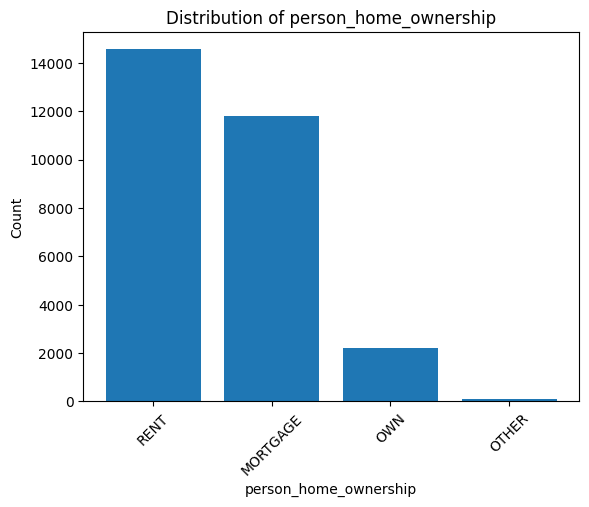

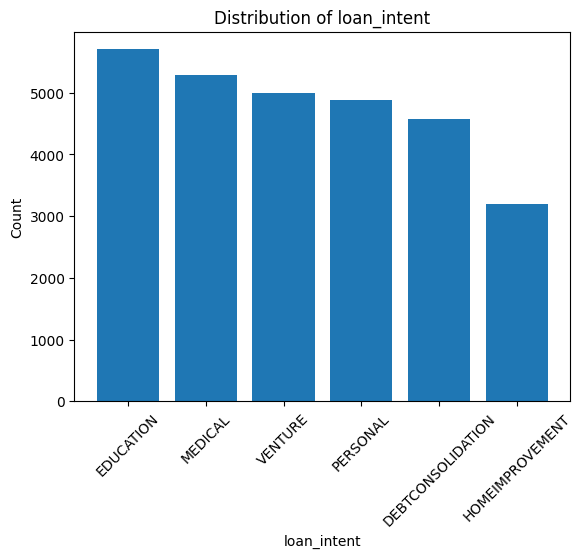

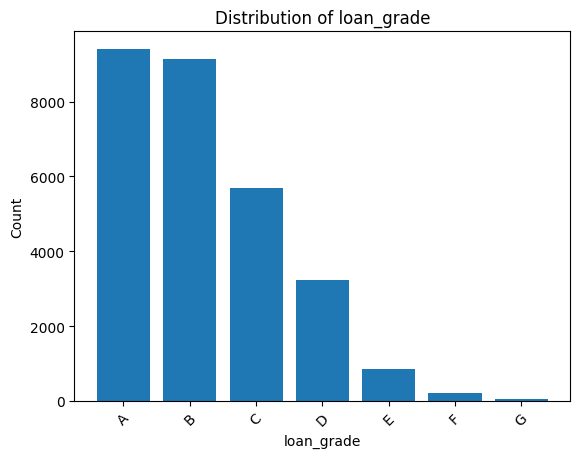

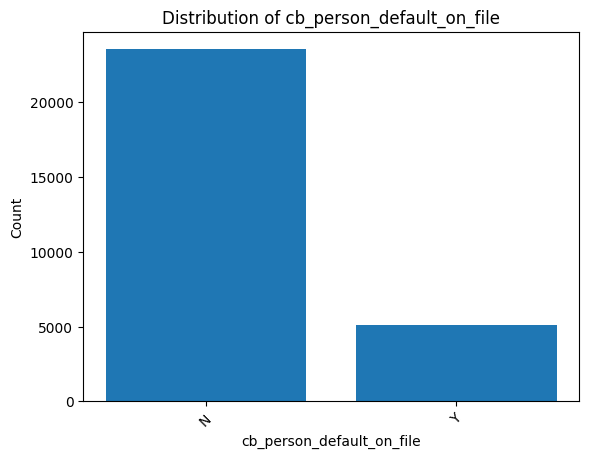

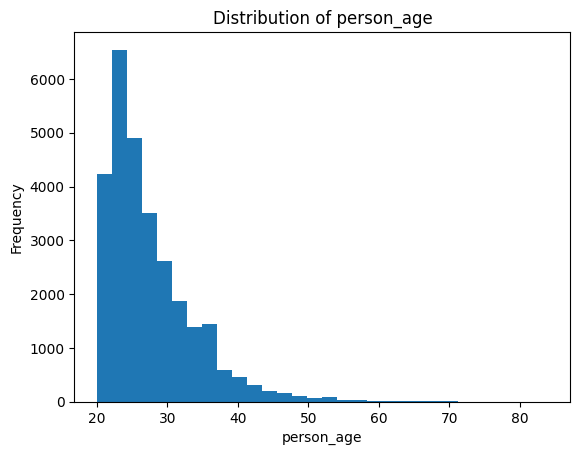

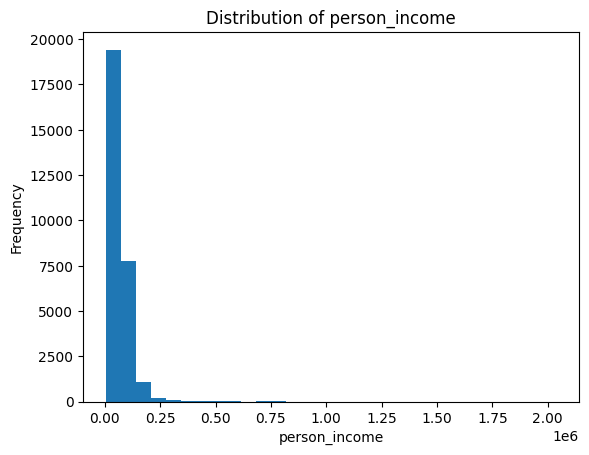

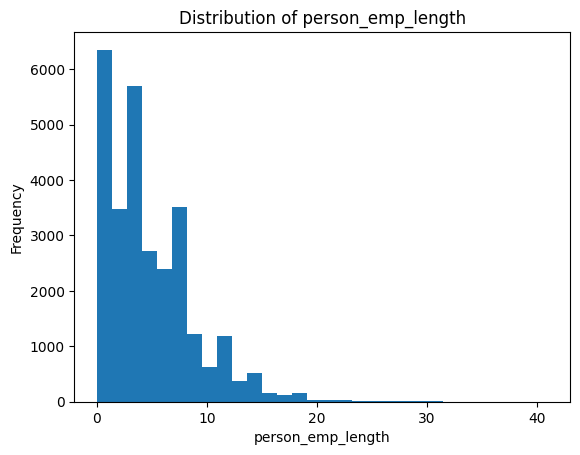

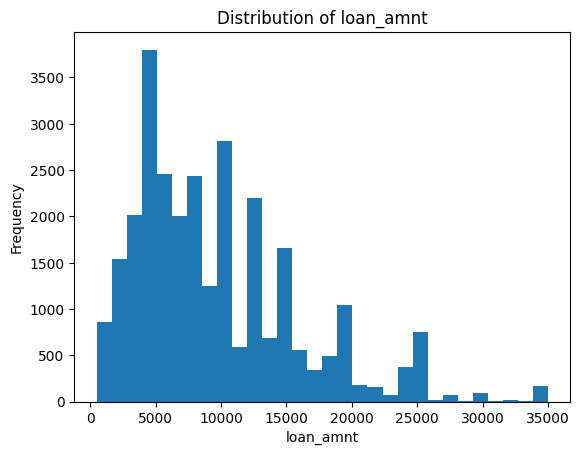

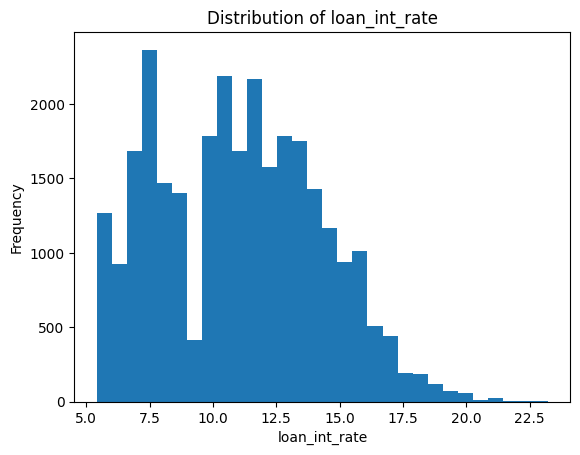

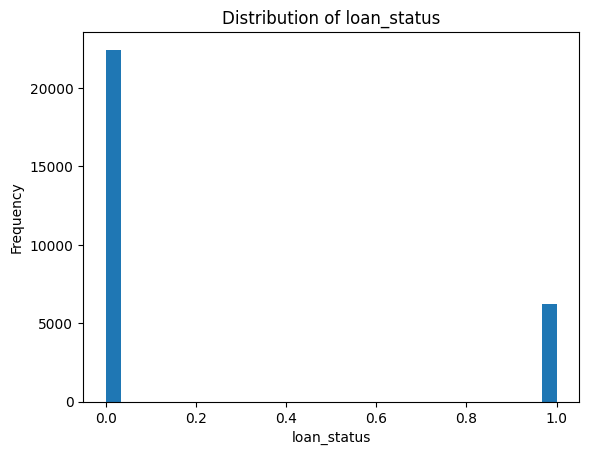

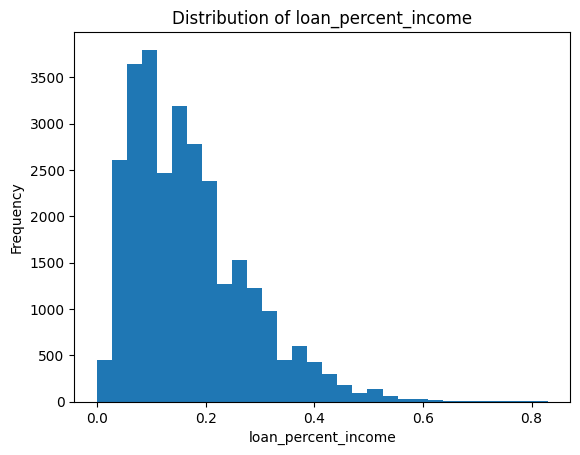

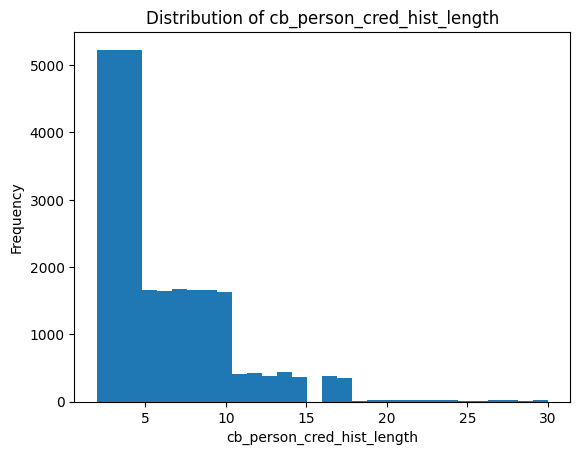

In [4]:
# 3. Categorical distributions
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    counts = df[col].value_counts()
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 4. Numeric distributions
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

g = (
    df.groupby(['person_home_ownership','loan_intent'])['loan_status']
      .agg(['sum','count'])
      .rename(columns={'sum':'defaults','count':'n'})
      .reset_index()
)
g['rate'] = g['defaults'] / g['n']
g[['ci_low','ci_high']] = g.apply(
    lambda r: pd.Series(proportion_confint(r['defaults'], r['n'], method='wilson')),
    axis=1
)
g.sort_values(['person_home_ownership','loan_intent'])


,person_home_ownership,loan_intent,defaults,n,rate,ci_low,ci_high
0,MORTGAGE,DEBTCONSOLIDATION,392.0,2016,0.194444,0.177756,0.212295
1,MORTGAGE,EDUCATION,193.0,2318,0.083261,0.072692,0.095210
2,MORTGAGE,HOMEIMPROVEMENT,211.0,1548,0.136305,0.120110,0.154300
3,MORTGAGE,MEDICAL,413.0,1894,0.218057,0.200041,0.237214
4,MORTGAGE,PERSONAL,185.0,2067,0.089502,0.077945,0.102582
5,MORTGAGE,VENTURE,91.0,1955,0.046547,0.038065,0.056808
6,OTHER,DEBTCONSOLIDATION,5.0,14,0.357143,0.163447,0.612356
7,OTHER,EDUCATION,5.0,14,0.357143,0.163447,0.612356
8,OTHER,HOMEIMPROVEMENT,2.0,11,0.181818,0.051368,0.476981
9,OTHER,MEDICAL,6.0,14,0.428571,0.213808,0.674094


In [6]:
import statsmodels.formula.api as smf
m = smf.logit(
    "loan_status ~ C(person_home_ownership) * C(loan_intent)",
    data=df
).fit()
print(m.summary())


Optimization terminated successfully.
         Current function value: 0.480432
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                28632
Model:                          Logit   Df Residuals:                    28608
Method:                           MLE   Df Model:                           23
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                 0.08066
Time:                        16:30:04   Log-Likelihood:                -13756.
converged:                       True   LL-Null:                       -14963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

Default rate pivot:
 loan_intent            DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  \
person_home_ownership                                                  
MORTGAGE                        0.194444   0.083261         0.136305   
OTHER                           0.357143   0.357143         0.181818   
OWN                             0.370968   0.044743         0.100000   
RENT                            0.354226   0.257612         0.426784   

loan_intent             MEDICAL  PERSONAL   VENTURE  
person_home_ownership                                
MORTGAGE               0.218057  0.089502  0.046547  
OTHER                  0.428571  0.500000  0.040000  
OWN                    0.082192  0.052493  0.038052  
RENT                   0.321854  0.310659  0.259949  


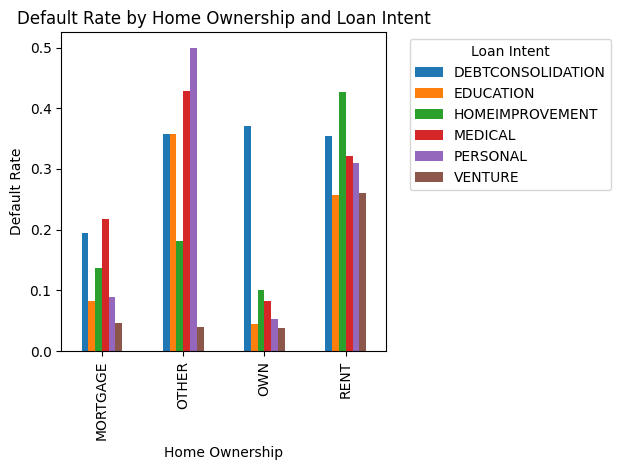

In [7]:
# 5. Pivot: Default rate by home ownership × loan intent
pivot_default = df.groupby(['person_home_ownership', 'loan_intent'])['loan_status'].mean().unstack()
print("Default rate pivot:\n", pivot_default)
pivot_default.plot(kind='bar')
plt.title('Default Rate by Home Ownership and Loan Intent')
plt.ylabel('Default Rate')
plt.xlabel('Home Ownership')
plt.legend(title='Loan Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

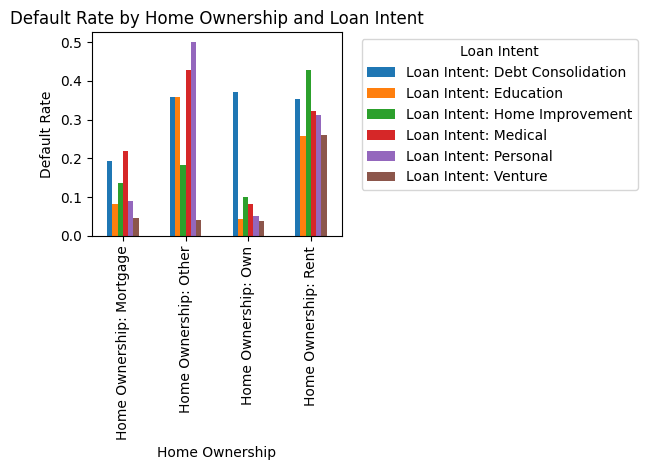

In [44]:
# Mapping dictionaries
home_ownership_map = {
    'MORTGAGE': 'Home Ownership: Mortgage',
    'OWN': 'Home Ownership: Own',
    'RENT': 'Home Ownership: Rent',
    'OTHER': 'Home Ownership: Other'
}

loan_intent_map = {
    'DEBTCONSOLIDATION': 'Loan Intent: Debt Consolidation',
    'EDUCATION': 'Loan Intent: Education',
    'HOMEIMPROVEMENT': 'Loan Intent: Home Improvement',
    'MEDICAL': 'Loan Intent: Medical',
    'PERSONAL': 'Loan Intent: Personal',
    'VENTURE': 'Loan Intent: Venture'
}

# Apply mappings
df['person_home_ownership'] = df['person_home_ownership'].replace(home_ownership_map)
df['loan_intent'] = df['loan_intent'].replace(loan_intent_map)

# Pivot and plot
pivot_default = df.groupby(['person_home_ownership', 'loan_intent'])['loan_status'].mean().unstack()

pivot_default.plot(kind='bar')
plt.title('Default Rate by Home Ownership and Loan Intent')
plt.ylabel('Default Rate')
plt.xlabel('Home Ownership')
plt.legend(title='Loan Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


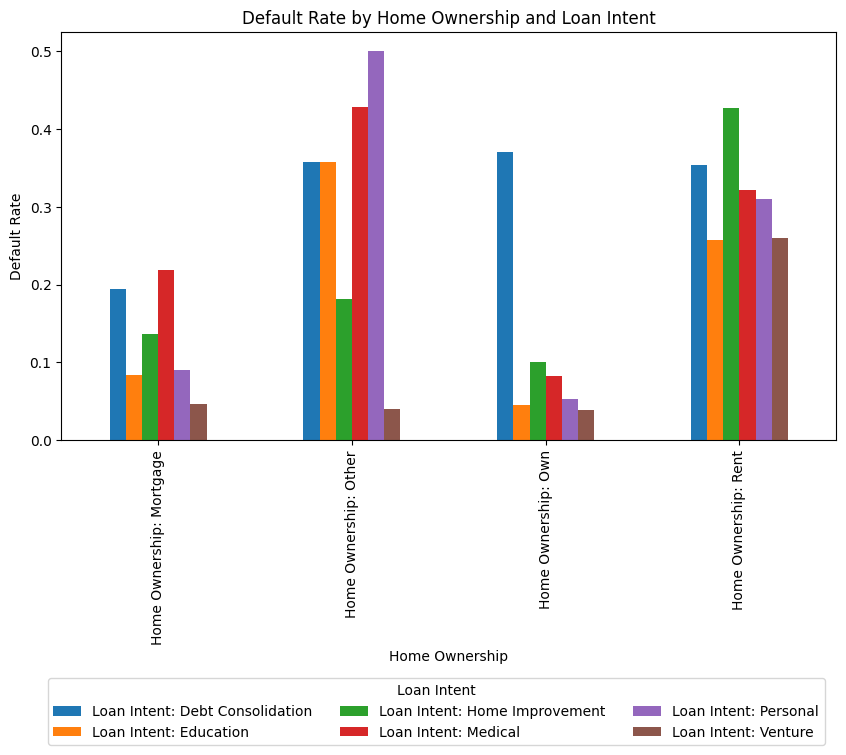

In [43]:
# Pivot and plot
pivot_default = df.groupby(
    ['person_home_ownership', 'loan_intent']
)['loan_status'].mean().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
pivot_default.plot(kind='bar', ax=ax)

# Titles and labels
ax.set_title('Default Rate by Home Ownership and Loan Intent')
ax.set_ylabel('Default Rate')
ax.set_xlabel('Home Ownership')

# Remove default axis legend
ax.legend_.remove()

# Add a figure-level legend outside the plot (bottom)
fig.legend(
    *ax.get_legend_handles_labels(),
    title='Loan Intent',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.32),  # position just below
    ncol=3
)

# Adjust bottom margin so legend fits
fig.subplots_adjust(bottom=0.2)

plt.show()


Avg interest rate pivot:
 loan_intent               Loan Intent: Debt Consolidation  \
person_home_ownership                                       
Home Ownership: Mortgage                        10.444067   
Home Ownership: Other                           11.940714   
Home Ownership: Own                             14.791129   
Home Ownership: Rent                            11.394214   

loan_intent               Loan Intent: Education  \
person_home_ownership                              
Home Ownership: Mortgage               10.560086   
Home Ownership: Other                  12.275000   
Home Ownership: Own                    11.021834   
Home Ownership: Rent                   11.305388   

loan_intent               Loan Intent: Home Improvement  Loan Intent: Medical  \
person_home_ownership                                                           
Home Ownership: Mortgage                      10.673521             10.581832   
Home Ownership: Other                         11.70

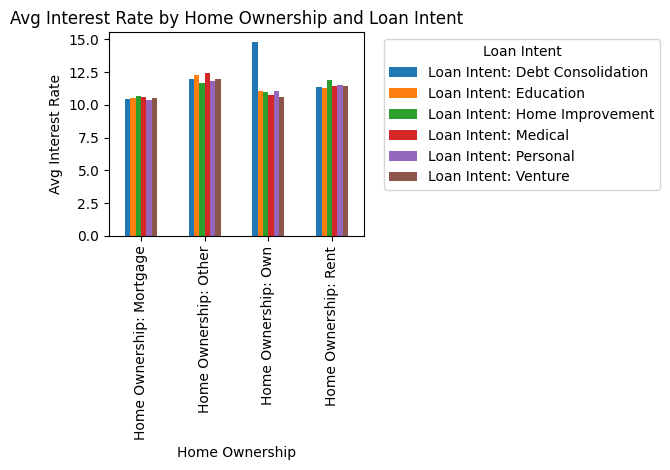

In [9]:
# 6. Pivot: Avg interest rate by home ownership × loan intent
pivot_int_rate = df.groupby(['person_home_ownership', 'loan_intent'])['loan_int_rate'].mean().unstack()
print("Avg interest rate pivot:\n", pivot_int_rate)
pivot_int_rate.plot(kind='bar')
plt.title('Avg Interest Rate by Home Ownership and Loan Intent')
plt.ylabel('Avg Interest Rate')
plt.xlabel('Home Ownership')
plt.legend(title='Loan Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Avg loan amount pivot:
 loan_intent               Loan Intent: Debt Consolidation  \
person_home_ownership                                       
Home Ownership: Mortgage                     10576.078869   
Home Ownership: Other                         9928.571429   
Home Ownership: Own                           8710.887097   
Home Ownership: Rent                          8944.389406   

loan_intent               Loan Intent: Education  \
person_home_ownership                              
Home Ownership: Mortgage            10571.742882   
Home Ownership: Other               11028.571429   
Home Ownership: Own                  8839.932886   
Home Ownership: Rent                 8782.646254   

loan_intent               Loan Intent: Home Improvement  Loan Intent: Medical  \
person_home_ownership                                                           
Home Ownership: Mortgage                   10832.364341          10689.176346   
Home Ownership: Other                      11322.7272

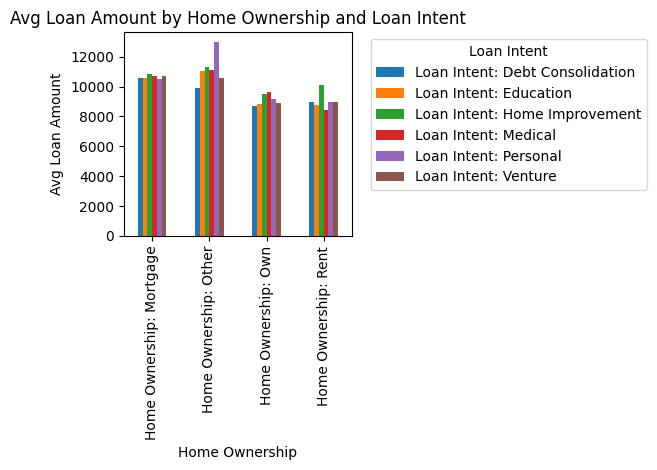

In [10]:
# 7. Pivot: Avg loan amount by home ownership × loan intent
pivot_loan_amt = df.groupby(['person_home_ownership', 'loan_intent'])['loan_amnt'].mean().unstack()
print("Avg loan amount pivot:\n", pivot_loan_amt)
pivot_loan_amt.plot(kind='bar')
plt.title('Avg Loan Amount by Home Ownership and Loan Intent')
plt.ylabel('Avg Loan Amount')
plt.xlabel('Home Ownership')
plt.legend(title='Loan Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Avg loan % income pivot:
 loan_intent               Loan Intent: Debt Consolidation  \
person_home_ownership                                       
Home Ownership: Mortgage                         0.152381   
Home Ownership: Other                            0.207143   
Home Ownership: Own                              0.215968   
Home Ownership: Rent                             0.184197   

loan_intent               Loan Intent: Education  \
person_home_ownership                              
Home Ownership: Mortgage                0.154116   
Home Ownership: Other                   0.190714   
Home Ownership: Own                     0.184340   
Home Ownership: Rent                    0.178915   

loan_intent               Loan Intent: Home Improvement  Loan Intent: Medical  \
person_home_ownership                                                           
Home Ownership: Mortgage                       0.149160              0.150697   
Home Ownership: Other                          0.16

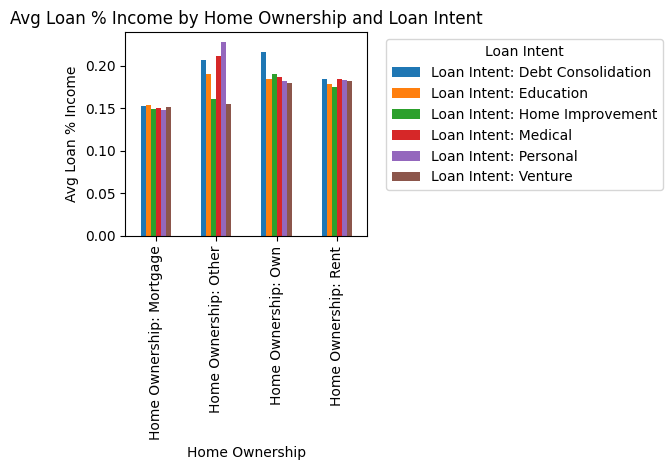

In [11]:
# 8. Pivot: Avg loan percent income by home ownership × loan intent
pivot_pct_inc = df.groupby(['person_home_ownership', 'loan_intent'])['loan_percent_income'].mean().unstack()
print("Avg loan % income pivot:\n", pivot_pct_inc)
pivot_pct_inc.plot(kind='bar')
plt.title('Avg Loan % Income by Home Ownership and Loan Intent')
plt.ylabel('Avg Loan % Income')
plt.xlabel('Home Ownership')
plt.legend(title='Loan Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Correlation matrix:
                             person_age  person_income  person_emp_length  \
person_age                    1.000000       0.141471           0.176054   
person_income                 0.141471       1.000000           0.160952   
person_emp_length             0.176054       0.160952           1.000000   
loan_amnt                     0.056061       0.324766           0.108390   
loan_int_rate                 0.010370      -0.003767          -0.058263   
loan_status                  -0.022498      -0.167028          -0.086486   
loan_percent_income          -0.039476      -0.297635          -0.060099   
cb_person_cred_hist_length    0.877581       0.122787           0.151571   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.056061       0.010370    -0.022498   
person_income                0.324766      -0.003767    -0.167028   
person_emp_length            0.108390      -0.058263    -0.086486   
loan_amnt         

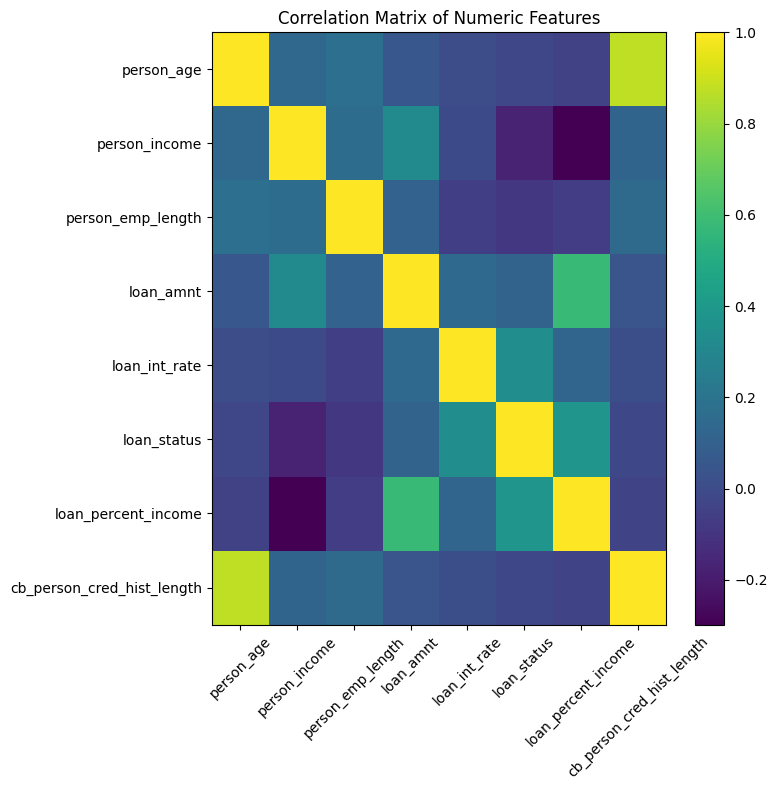

In [12]:
# 9. Correlation matrix of numeric features
corr = df[numeric_cols].corr()
print("Correlation matrix:\n", corr)
plt.figure(figsize=(8,8))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


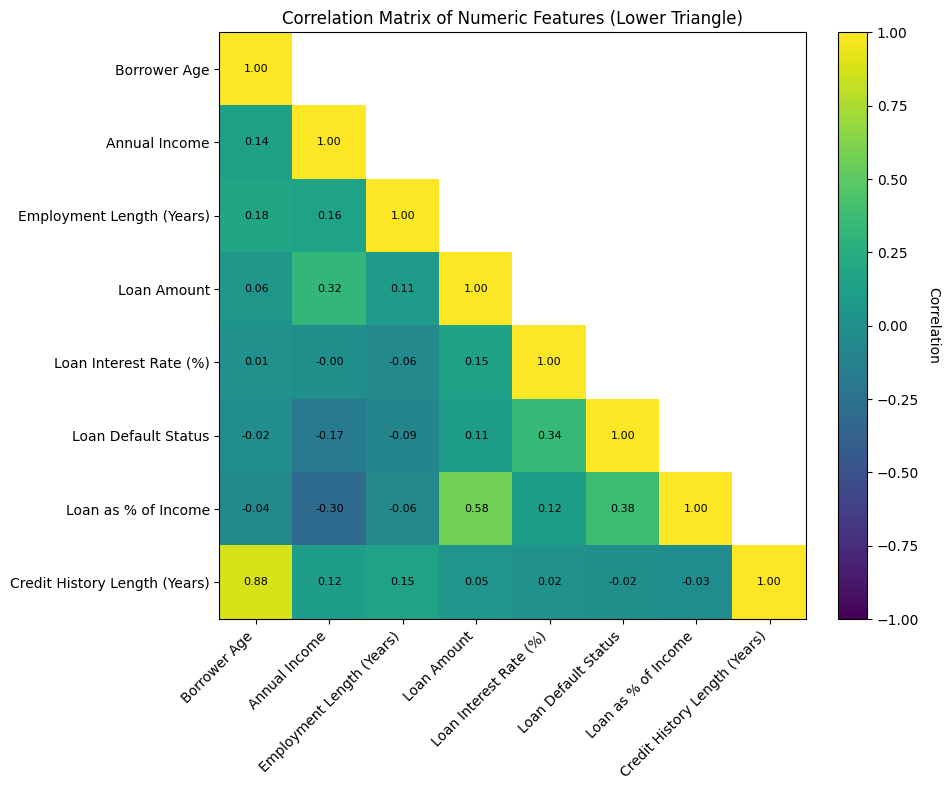

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Correlation matrix
corr = df[numeric_cols].corr()

# Map variable names to actual labels
numeric_label_map = {
    'person_age': 'Borrower Age',
    'person_income': 'Annual Income',
    'person_emp_length': 'Employment Length (Years)',
    'loan_amnt': 'Loan Amount',
    'loan_int_rate': 'Loan Interest Rate (%)',
    'loan_status': 'Loan Default Status',
    'loan_percent_income': 'Loan as % of Income',
    'cb_person_cred_hist_length': 'Credit History Length (Years)'
}

corr.index = [numeric_label_map[col] for col in corr.index]
corr.columns = [numeric_label_map[col] for col in corr.columns]

# Mask the upper triangle (keep lower + diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Apply mask
corr_masked = corr.where(~mask)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_masked, vmin=-1, vmax=1, cmap='viridis')

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Correlation', rotation=270, labelpad=15)

# Axis labels
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)

# Annotate with values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if not mask[i, j]:
            ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                    ha='center', va='center', fontsize=8, color='black')

ax.set_title('Correlation Matrix of Numeric Features (Lower Triangle)')
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# 2. Define features and target
X = df.drop(columns='loan_status')
y = df['loan_status']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
# 4. Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [16]:
# 5. Define preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 6. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


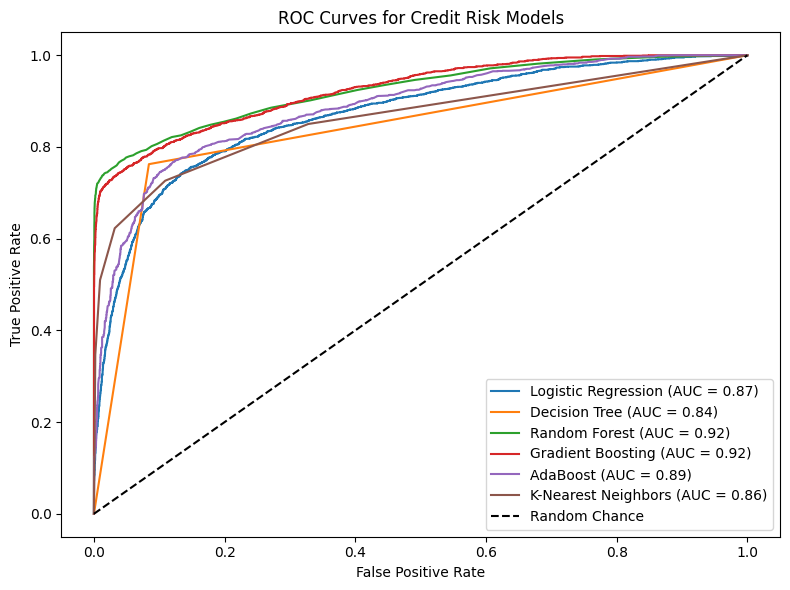


Model Comparison:

                     Accuracy  Precision (Default)  Recall (Default)  \
Model                                                                  
Logistic Regression     0.864                0.749             0.558   
Decision Tree           0.883                0.715             0.762   
Random Forest           0.935                0.967             0.723   
Gradient Boosting       0.926                0.931             0.713   
AdaBoost                0.873                0.749             0.623   
K-Nearest Neighbors     0.893                0.844             0.623   

                     F1 (Default)  ROC AUC  
Model                                       
Logistic Regression         0.640    0.870  
Decision Tree               0.738    0.839  
Random Forest               0.827    0.924  
Gradient Boosting           0.807    0.925  
AdaBoost                    0.680    0.887  
K-Nearest Neighbors         0.717    0.863  


In [17]:
# 7. Evaluate models
results = []
plt.figure(figsize=(8, 6))

for name, clf in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    # Metrics
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Default)': precision_score(y_test, y_pred),
        'Recall (Default)': recall_score(y_test, y_pred),
        'F1 (Default)': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

# 8. Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Credit Risk Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 9. Show comparison table
results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Comparison:\n")
print(results_df.round(3))



In [18]:
# --- CLEAN, STABLE LOGIT OUTPUT (no inf/NaN; pretty labels + magnitudes) ---

import numpy as np
import pandas as pd
import statsmodels.api as sm

# 0) Refit the preprocessor on train (safe; matches your pipeline)
preprocessor.fit(X_train)

# 1) Transform to design matrices
X_tr = preprocessor.transform(X_train)
X_te = preprocessor.transform(X_test)
feat_names = preprocessor.get_feature_names_out()

Xtr_df = pd.DataFrame(X_tr, columns=feat_names, index=X_train.index)
Xte_df = pd.DataFrame(X_te, columns=feat_names, index=X_test.index)

# 2) Detect & drop perfect-separation columns (typical with rare OHE levels)
#    Rule: if a binary column perfectly predicts y (all y=1 when x=1 OR all y=0 when x=1).
def is_binary(col: pd.Series) -> bool:
    u = pd.unique(col.dropna())
    return len(u) <= 2 and set(u).issubset({0, 1})

perfect_cols = []
for c in Xtr_df.columns:
    s = Xtr_df[c]
    if is_binary(s):
        # If there are any rows with x=1:
        if s.sum() > 0:
            y_when_1 = y_train[s == 1]
            # perfect if all ones or all zeros:
            if y_when_1.nunique() == 1:
                perfect_cols.append(c)

# Drop those columns (and warn)
if perfect_cols:
    print(f"Dropping {len(perfect_cols)} perfect-separation columns:", perfect_cols)
    Xtr_df = Xtr_df.drop(columns=perfect_cols)
    Xte_df = Xte_df.drop(columns=perfect_cols)

# 3) Add intercept and fit GLM Binomial (more stable than Logit MLE here)
Xtr_const = sm.add_constant(Xtr_df, has_constant='add')
glm = sm.GLM(y_train, Xtr_const, family=sm.families.Binomial())
glm_res = glm.fit()

# 4) Tidy coefficient table with ORs and 95% CI
coef = glm_res.params
se   = glm_res.bse
pval = glm_res.pvalues
OR   = np.exp(coef)
CI_l = np.exp(coef - 1.96*se)
CI_u = np.exp(coef + 1.96*se)

coef_tbl = (
    pd.DataFrame({
        "Coefficient (β)": coef,
        "Std. Error": se,
        "p-value": pval,
        "Odds Ratio": OR,
        "OR 95% CI Low": CI_l,
        "OR 95% CI High": CI_u
    })
    .rename_axis("Feature")
    .reset_index()
)

# 5) Human-readable labels for paper (edit/extend as needed)
pretty = {
    "const": "Intercept",
    "num__person_age": "Person Age (years)",
    "num__person_income": "Person Annual Income (USD)",
    "num__person_emp_length": "Person Employment Length (years)",
    "num__loan_amnt": "Loan Amount (USD)",
    "num__loan_int_rate": "Loan Interest Rate (%)",
    "num__loan_percent_income": "Loan as a Percent of Income",
    "num__cb_person_cred_hist_length": "Credit History Length (years)",
    # OHE examples (adjust to your actual categories present after drop):
    "cat__person_home_ownership_RENT": "Person Home Ownership Types: Renter",
    "cat__person_home_ownership_MORTGAGE": "Person Home Ownership Types: Mortgage Holder",
    "cat__person_home_ownership_OWN": "Person Home Ownership Types: Owner",
    "cat__loan_intent_EDUCATION": "Loan Intent: Education",
    "cat__loan_intent_DEBTCONSOLIDATION": "Loan Intent: Debt Consolidation",
    "cat__loan_intent_HOMEIMPROVEMENT": "Loan Intent: Home Improvement",
    "cat__cb_person_default_on_file_Y": "Prior Default on File: Yes",
}
coef_tbl["Variable"] = coef_tbl["Feature"].map(lambda s: pretty.get(s, s))
coef_tbl = coef_tbl[["Variable", "Coefficient (β)", "Std. Error", "p-value",
                     "Odds Ratio", "OR 95% CI Low", "OR 95% CI High"]]

# 6) Economic magnitude: OR for interpretable raw-unit deltas (since numerics were scaled)
def or_for_delta(raw_series, beta, delta):
    sd = raw_series.std()
    if sd == 0 or pd.isna(sd):
        return np.nan
    return float(np.exp(beta * (delta / sd)))

mags = []
# Edit the deltas to what you want to report in the paper:
deltas = [
    ("loan_int_rate", "Loan Interest Rate (%)", 1.0),          # +1 percentage point
    ("cb_person_cred_hist_length", "Credit History Length (years)", 1.0),  # +1 year
    ("loan_percent_income", "Loan as a Percent of Income", 0.05),          # +5 percentage points
]
for raw_col, nice, delta in deltas:
    feat_name = f"num__{raw_col}"
    beta = coef.get(feat_name, np.nan)
    if pd.notna(beta) and raw_col in X_train.columns:
        mags.append({
            "Variable": nice,
            "Delta (raw units)": delta,
            "Odds Ratio for Delta": or_for_delta(X_train[raw_col], beta, delta)
        })
magnitude_tbl = pd.DataFrame(mags)

# 7) Sort & display (you can export to CSV/LaTeX if you like)
coef_tbl_sorted = (
    coef_tbl
      .query("Variable != 'Intercept'")
      .sort_values("p-value")
      .reset_index(drop=True)
)

print("\n=== Logistic Regression (GLM Binomial) Coefficients ===")
display(coef_tbl_sorted.head(20))
print("\n=== Economic Magnitudes (example deltas) ===")
display(magnitude_tbl)


Dropping 1 perfect-separation columns: ['cat__loan_grade_G']

=== Logistic Regression (GLM Binomial) Coefficients ===


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,Coefficient (β),Std. Error,p-value,Odds Ratio,OR 95% CI Low,OR 95% CI High
0,Loan as a Percent of Income,1.435929,3.505954e-02,0.000000e+00,4.203549e+00,3.924396,4.502559
1,Loan Amount (USD),-0.695104,3.584853e-02,9.370588e-84,4.990227e-01,0.465163,0.535347
2,Loan Interest Rate (%),0.417276,7.111889e-02,4.429496e-09,1.517821e+00,1.320331,1.744851
3,Person Annual Income (USD),0.099367,3.116096e-02,1.428500e-03,1.104472e+00,1.039034,1.174030
4,Person Employment Length (years),-0.055608,2.445671e-02,2.298106e-02,9.459094e-01,0.901637,0.992356
5,Person Age (years),-0.061881,4.612055e-02,1.796858e-01,9.399947e-01,0.858750,1.028926
6,Credit History Length (years),0.044103,4.561770e-02,3.336431e-01,1.045090e+00,0.955704,1.142837
7,cat__person_home_ownership_Home Ownership: Rent,6.407998,1.501184e+06,9.999966e-01,6.066778e+02,0.000000,inf
8,cat__loan_intent_Loan Intent: Home Improvement,4.140760,1.000789e+06,9.999967e-01,6.285057e+01,0.000000,inf
9,cat__loan_intent_Loan Intent: Debt Consolidation,4.125453,1.000789e+06,9.999967e-01,6.189585e+01,0.000000,inf



=== Economic Magnitudes (example deltas) ===


,Variable,Delta (raw units),Odds Ratio for Delta
0,Loan Interest Rate (%),1.00,1.137980
1,Credit History Length (years),1.00,1.011058
2,Loan as a Percent of Income,0.05,1.965299


In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = {}

for name, clf in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    scores = cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc')
    cv_results[name] = {
        'Mean ROC AUC': np.mean(scores),
        'Std Dev': np.std(scores)
    }

# Print results
cv_df = pd.DataFrame(cv_results).T.sort_values(by='Mean ROC AUC', ascending=False)
print("\n5-Fold Cross-Validated ROC AUC Scores:\n")
print(cv_df.round(4))



5-Fold Cross-Validated ROC AUC Scores:

                     Mean ROC AUC  Std Dev
Random Forest              0.9311   0.0044
Gradient Boosting          0.9265   0.0038
AdaBoost                   0.8897   0.0038
Logistic Regression        0.8711   0.0057
K-Nearest Neighbors        0.8649   0.0099
Decision Tree              0.8472   0.0060


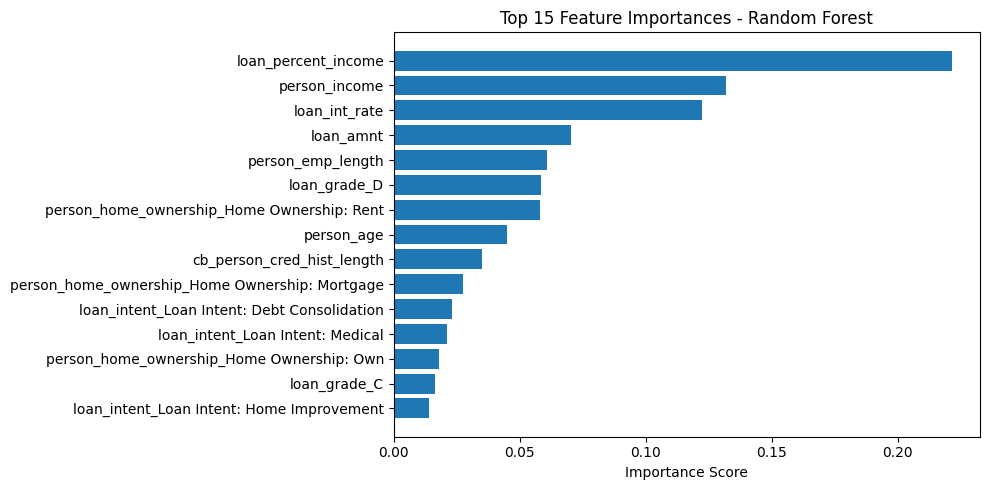

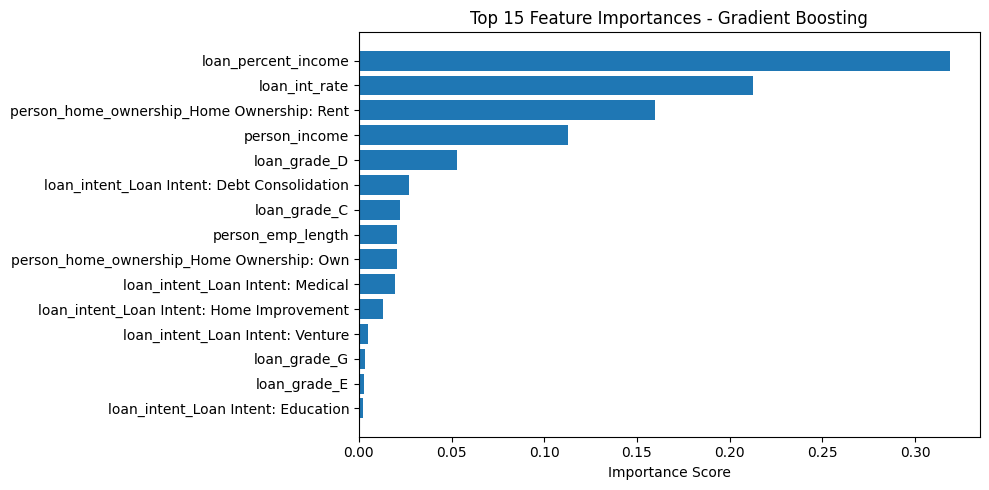

In [20]:
importances_rf = models['Random Forest'].feature_importances_
importances_gb = models['Gradient Boosting'].feature_importances_

# Fit the preprocessors separately to get feature names
preprocessor.fit(X)
encoded_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_features)

# Random Forest
rf_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False).head(15)

# Gradient Boosting
gb_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False).head(15)

# Plot RF
plt.figure(figsize=(10,5))
plt.barh(rf_importances_df['Feature'][::-1], rf_importances_df['Importance'][::-1])
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Plot GB
plt.figure(figsize=(10,5))
plt.barh(gb_importances_df['Feature'][::-1], gb_importances_df['Importance'][::-1])
plt.title('Top 15 Feature Importances - Gradient Boosting')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


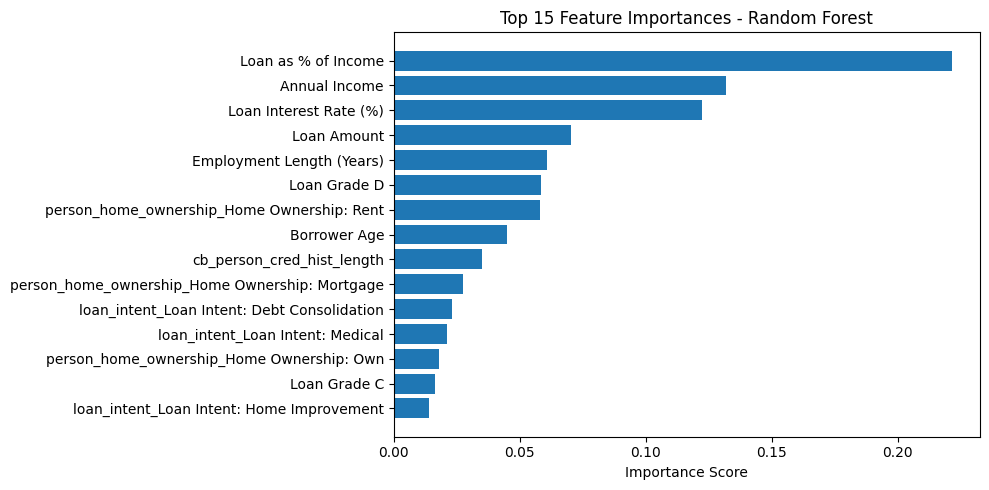

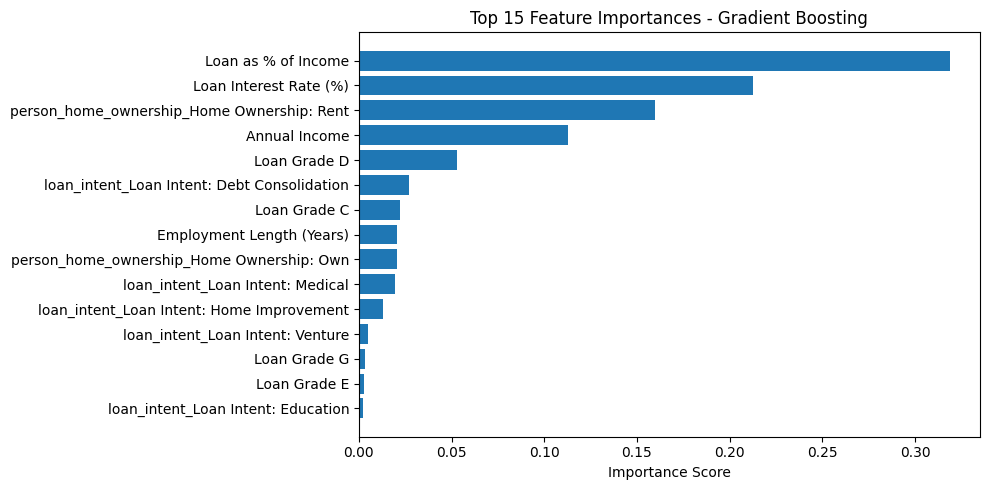

In [21]:
# Mapping dictionary for feature names
feature_label_map = {
    'loan_percent_income': 'Loan as % of Income',
    'loan_int_rate': 'Loan Interest Rate (%)',
    'person_home_ownership_RENT': 'Home Ownership: Rent',
    'person_home_ownership_OWN': 'Home Ownership: Own',
    'person_home_ownership_MORTGAGE': 'Home Ownership: Mortgage',
    'person_home_ownership_OTHER': 'Home Ownership: Other',
    'person_income': 'Annual Income',
    'loan_grade_D': 'Loan Grade D',
    'loan_grade_C': 'Loan Grade C',
    'loan_grade_E': 'Loan Grade E',
    'loan_grade_G': 'Loan Grade G',
    'loan_intent_DEBTCONSOLIDATION': 'Loan Intent: Debt Consolidation',
    'loan_intent_HOMEIMPROVEMENT': 'Loan Intent: Home Improvement',
    'loan_intent_EDUCATION': 'Loan Intent: Education',
    'loan_intent_PERSONAL': 'Loan Intent: Personal',
    'loan_intent_MEDICAL': 'Loan Intent: Medical',
    'loan_intent_VENTURE': 'Loan Intent: Venture',
    'loan_amnt': 'Loan Amount',
    'person_emp_length': 'Employment Length (Years)',
    'person_age': 'Borrower Age'
}

# Apply mapping to RF feature importances
rf_importances_df = pd.DataFrame({
    'Feature': [feature_label_map.get(f, f) for f in all_feature_names],
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False).head(15)

# Apply mapping to GB feature importances
gb_importances_df = pd.DataFrame({
    'Feature': [feature_label_map.get(f, f) for f in all_feature_names],
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False).head(15)

# Plot Random Forest
plt.figure(figsize=(10, 5))
plt.barh(rf_importances_df['Feature'][::-1], rf_importances_df['Importance'][::-1])
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Plot Gradient Boosting
plt.figure(figsize=(10, 5))
plt.barh(gb_importances_df['Feature'][::-1], gb_importances_df['Importance'][::-1])
plt.title('Top 15 Feature Importances - Gradient Boosting')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [22]:
import shap

In [23]:
# Refit gradient boosting pipeline
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb_model.fit(X_train, y_train)

# Extract preprocessed data and trained model
X_processed = preprocessor.transform(X_test)
model_only = gb_model.named_steps['classifier']


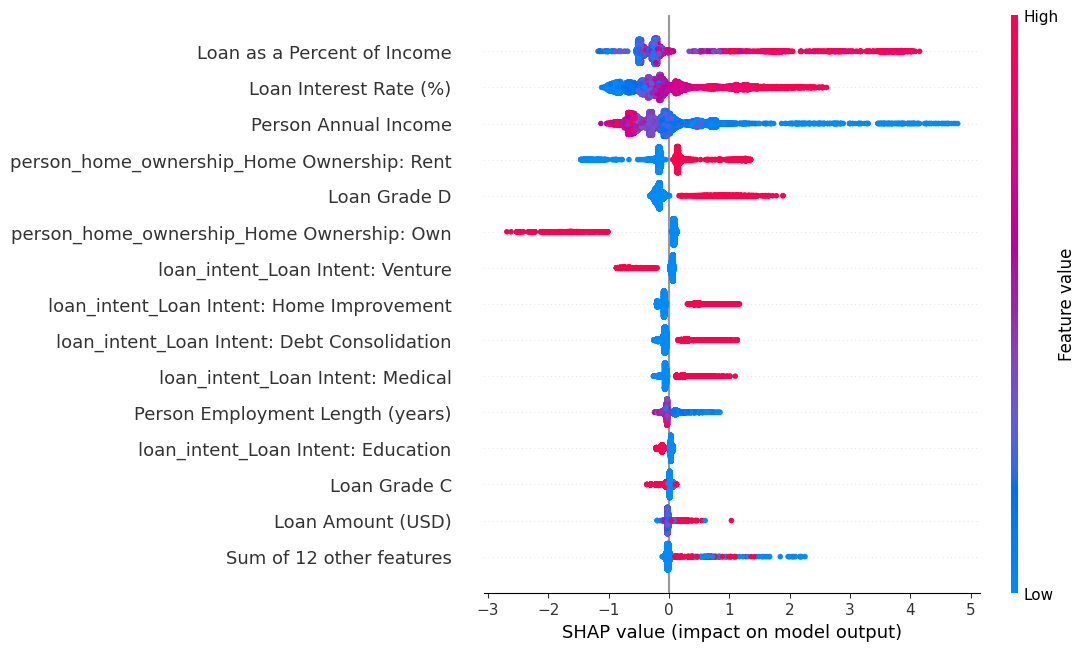

In [24]:
# Get the fitted preprocessor from the pipeline
ct = gb_model.named_steps["preprocessor"]  # ColumnTransformer (already fitted)

# If you used these earlier, keep them:
# numeric_features = [...]
# categorical_features = [...]

# Locate the fitted OneHotEncoder inside the ColumnTransformer
# (works whether you wrapped it in a Pipeline or added it directly)
ohe = ct.named_transformers_.get("cat", ct.named_transformers_.get("categorical"))
if hasattr(ohe, "named_steps"):   # if you used a Pipeline for categorical
    ohe = ohe.named_steps.get("onehot", ohe.named_steps[list(ohe.named_steps.keys())[-1]])

# Get names for the encoded categorical columns
encoded_cat_names = ohe.get_feature_names_out(categorical_features)

# Transform X_test with the same preprocessor and make a DataFrame with proper column names
X_test_transformed_array = ct.transform(X_test)
if hasattr(X_test_transformed_array, "toarray"):  # handle sparse output
    X_test_transformed_array = X_test_transformed_array.toarray()

all_feature_names = list(numeric_features) + list(encoded_cat_names)
X_test_transformed = pd.DataFrame(
    X_test_transformed_array, columns=all_feature_names, index=X_test.index
)

# SHAP on the trained model using the transformed DataFrame
import shap
# 1) Map technical feature names -> publication-ready labels
label_map = {
    # numeric
    'loan_percent_income': 'Loan as a Percent of Income',
    'loan_int_rate': 'Loan Interest Rate (%)',
    'person_income': 'Person Annual Income',
    'person_emp_length': 'Person Employment Length (years)',
    'loan_amnt': 'Loan Amount (USD)',
    'person_age': 'Person Age (years)',
    'cb_person_cred_hist_length': 'Credit History Length (years)',

    # home ownership (OHE)
    'person_home_ownership_RENT': 'Person Home Ownership Type: Rent',
    'person_home_ownership_MORTGAGE': 'Person Home Ownership Type: Mortgage',
    'person_home_ownership_OWN': 'Person Home Ownership Type: Own',
    'person_home_ownership_OTHER': 'Person Home Ownership Type: Other',

    # loan intent (OHE)
    'loan_intent_DEBTCONSOLIDATION': 'Loan Intent: Debt Consolidation',
    'loan_intent_HOMEIMPROVEMENT': 'Loan Intent: Home Improvement',
    'loan_intent_EDUCATION': 'Loan Intent: Education',
    'loan_intent_PERSONAL': 'Loan Intent: Personal',
    'loan_intent_MEDICAL': 'Loan Intent: Medical',
    'loan_intent_VENTURE': 'Loan Intent: Venture',

    # loan grade (OHE)
    'loan_grade_A': 'Loan Grade A',
    'loan_grade_B': 'Loan Grade B',
    'loan_grade_C': 'Loan Grade C',
    'loan_grade_D': 'Loan Grade D',
    'loan_grade_E': 'Loan Grade E',
    'loan_grade_F': 'Loan Grade F',
    'loan_grade_G': 'Loan Grade G',
}

# 2) Build the transformed DataFrame (you already have X_test_transformed_array)
X_test_transformed = pd.DataFrame(
    X_test_transformed_array,
    columns=all_feature_names,  # from your preprocessor.get_feature_names_out()
    index=X_test.index
)

# 3) Rename columns using the map (fallback to original if not in map)
X_test_transformed.columns = [label_map.get(c, c) for c in X_test_transformed.columns]

explainer = shap.Explainer(gb_model.named_steps["classifier"], X_test_transformed)
shap_values = explainer(X_test_transformed)

shap.plots.beeswarm(shap_values, max_display=15)
